In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Lets Load the Boston House Pricing Dataset

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [8]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [9]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


# Preparing The Dataset

In [10]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [11]:
df.sample(5)

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
153   2.14918  0.0  19.58   0.0  0.871  5.709  98.5  1.6232   5.0  403.0   
390   6.96215  0.0  18.10   0.0  0.700  5.713  97.0  1.9265  24.0  666.0   
479  14.33370  0.0  18.10   0.0  0.614  6.229  88.0  1.9512  24.0  666.0   
330   0.04544  0.0   3.24   0.0  0.460  6.144  32.2  5.8736   4.0  430.0   
150   1.65660  0.0  19.58   0.0  0.871  6.122  97.3  1.6180   5.0  403.0   

     PTRATIO       B  LSTAT  
153     14.7  261.95  15.79  
390     20.2  394.43  17.11  
479     20.2  383.32  13.11  
330     16.9  368.57   9.09  
150     14.7  372.80  14.10

In [12]:
df['PRICE'] = boston.target

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [14]:
# Checking for Missing values

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
# Summarizing the Stats of the data

df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Exploratory Data Analysis

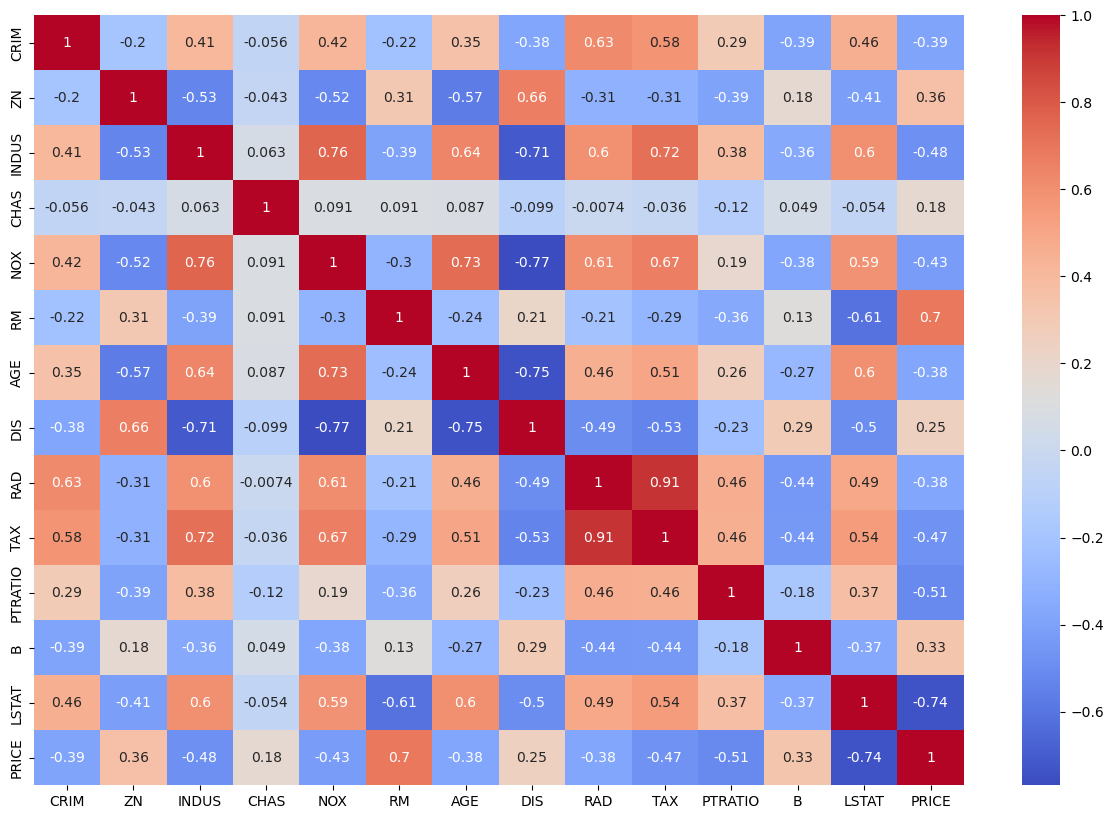

In [17]:
# Correlation  (Heat Map)

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')
plt.show()

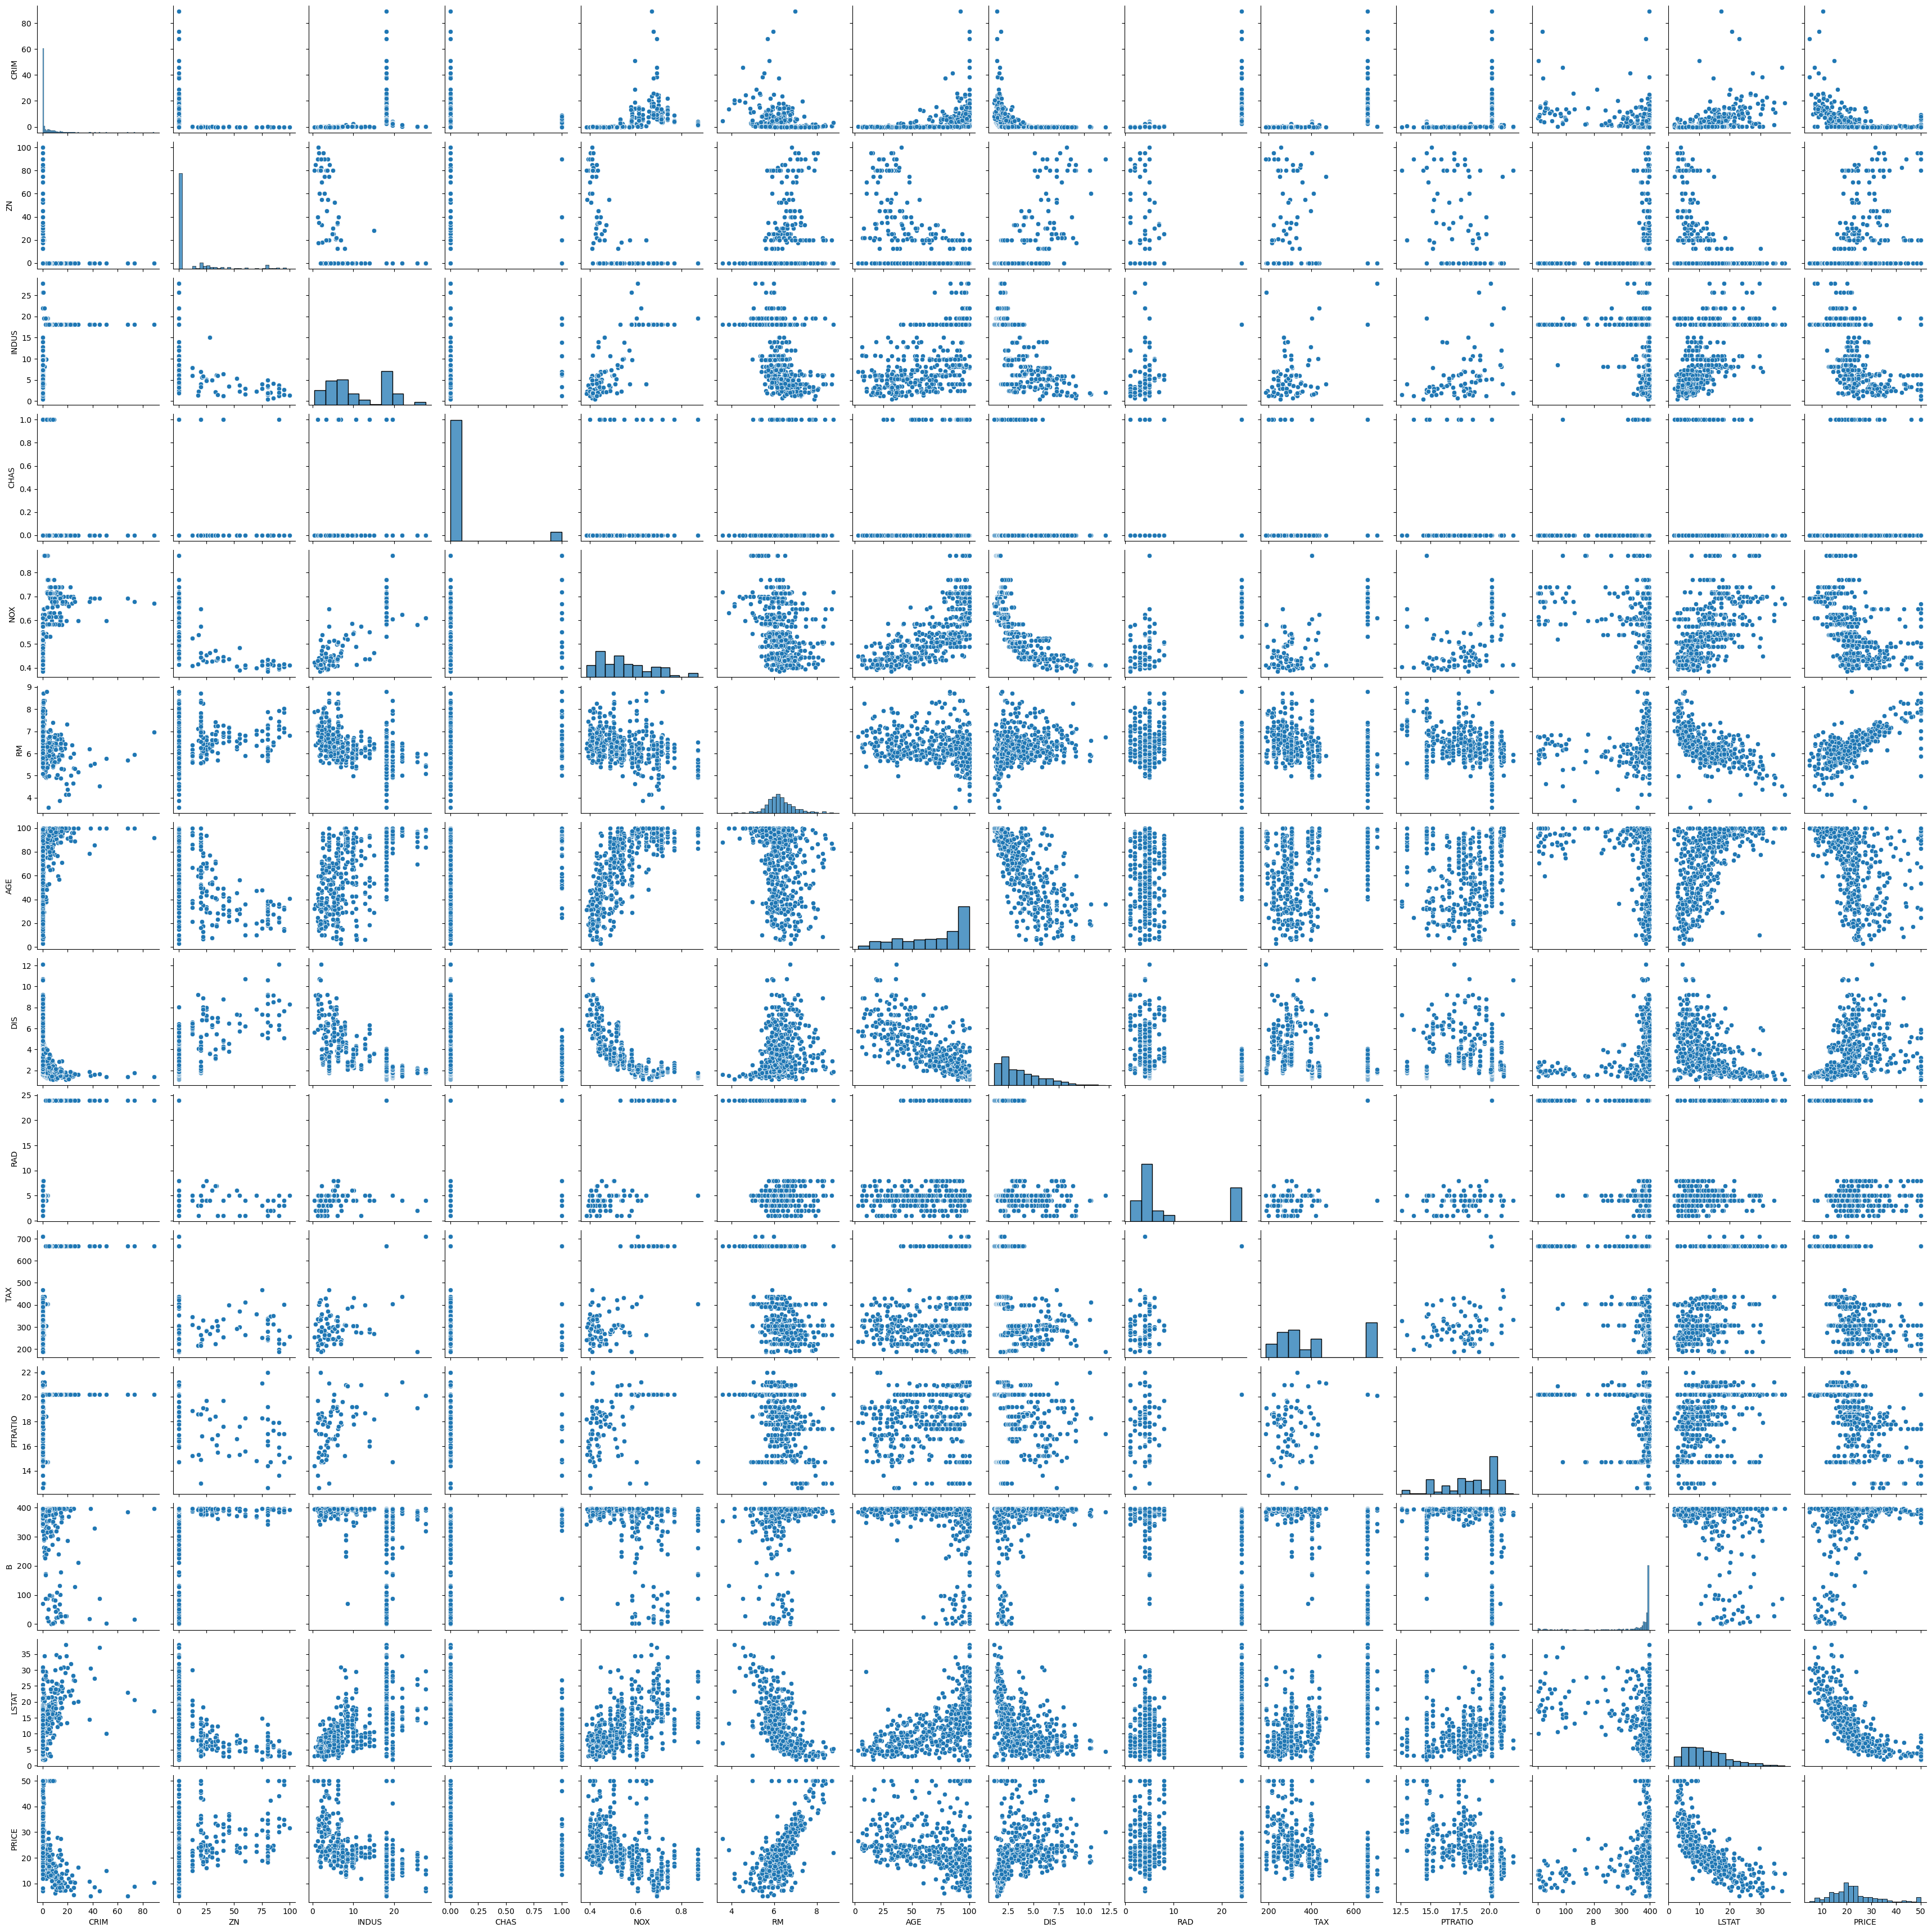

In [18]:
sns.pairplot(df)

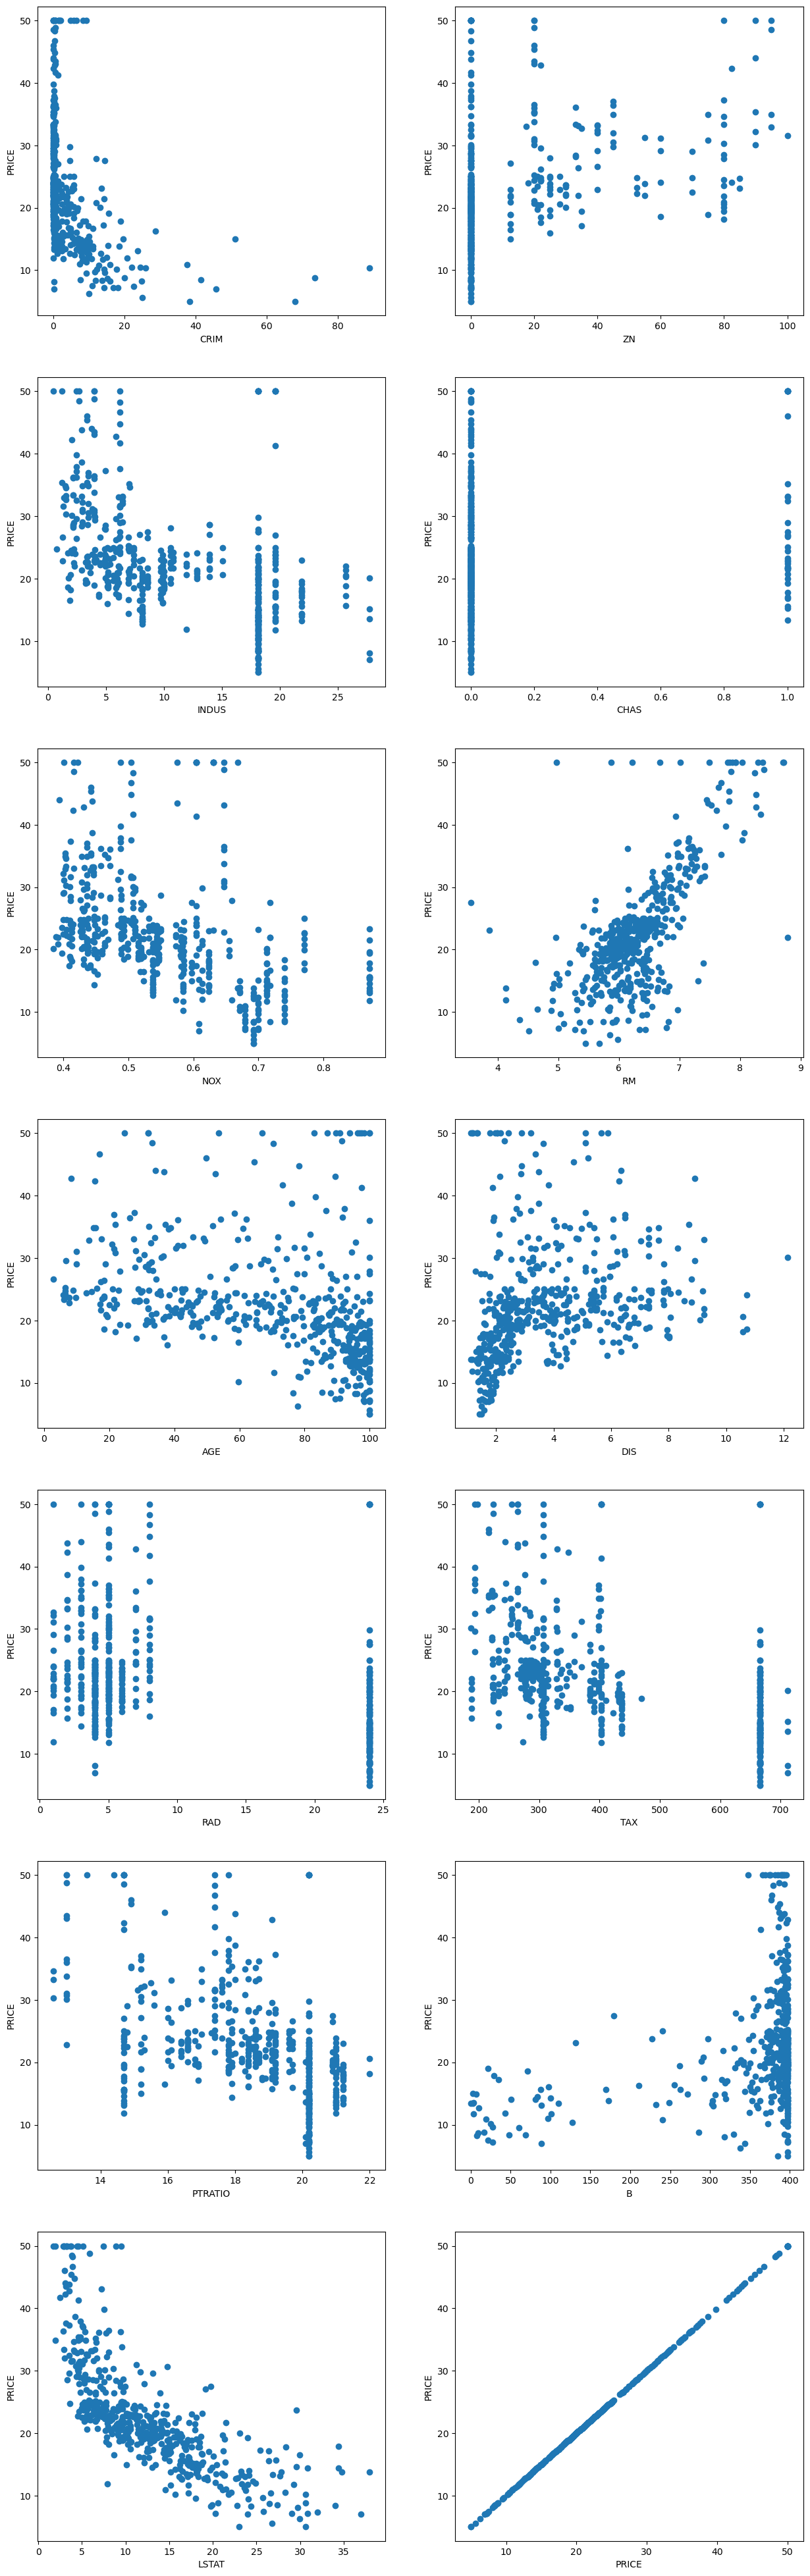

In [19]:
plt.figure(figsize = (15, 50))

i = 1

for col in df.columns:
    plt.subplot(7, 2, i)
    plt.scatter(df[col], df['PRICE'])
    plt.xlabel(col)
    plt.ylabel('PRICE')
    i += 1

Text(0, 0.5, 'PRICE')

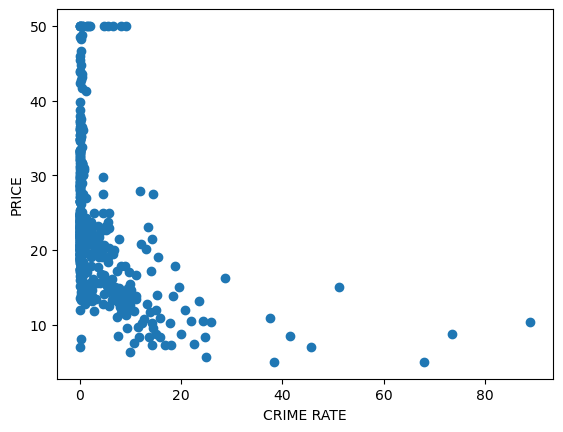

In [20]:
plt.scatter(df['CRIM'], df['PRICE'])
plt.xlabel("CRIME RATE")
plt.ylabel("PRICE")

Text(0, 0.5, 'PRICE')

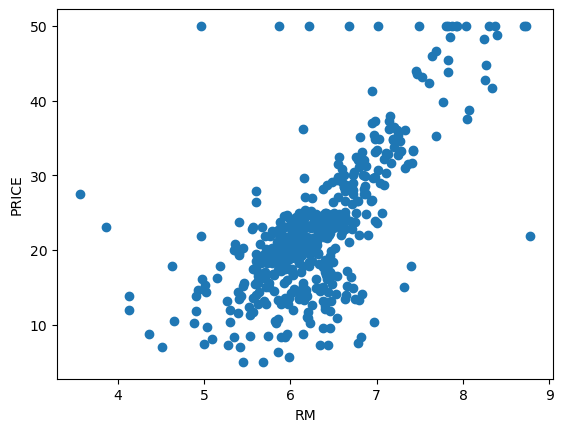

In [21]:
plt.scatter(df['RM'], df['PRICE'])
plt.xlabel('RM')
plt.ylabel('PRICE')

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

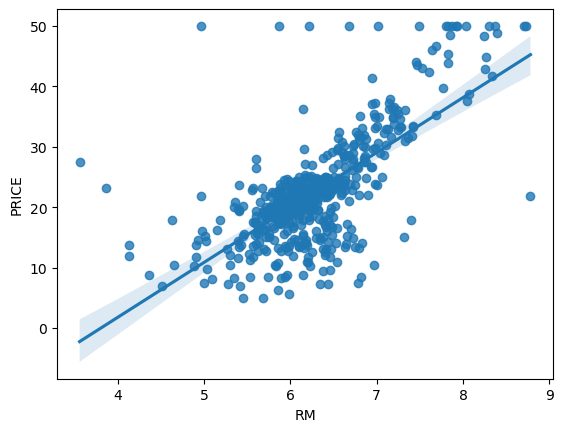

In [22]:
# Regression Plot

sns.regplot(x = "RM", y = "PRICE", data = df)

<AxesSubplot:xlabel='LSTAT', ylabel='PRICE'>

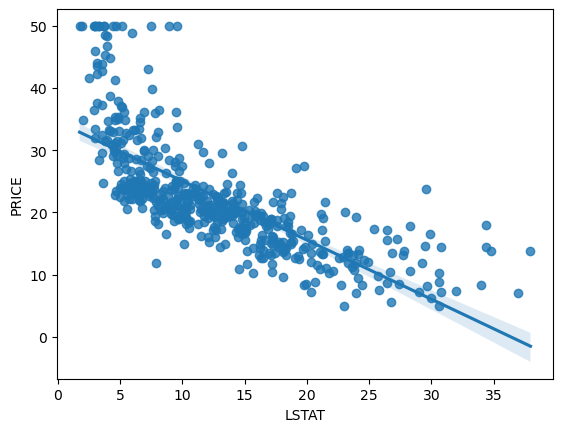

In [23]:
sns.regplot(x = "LSTAT", y = "PRICE", data = df)

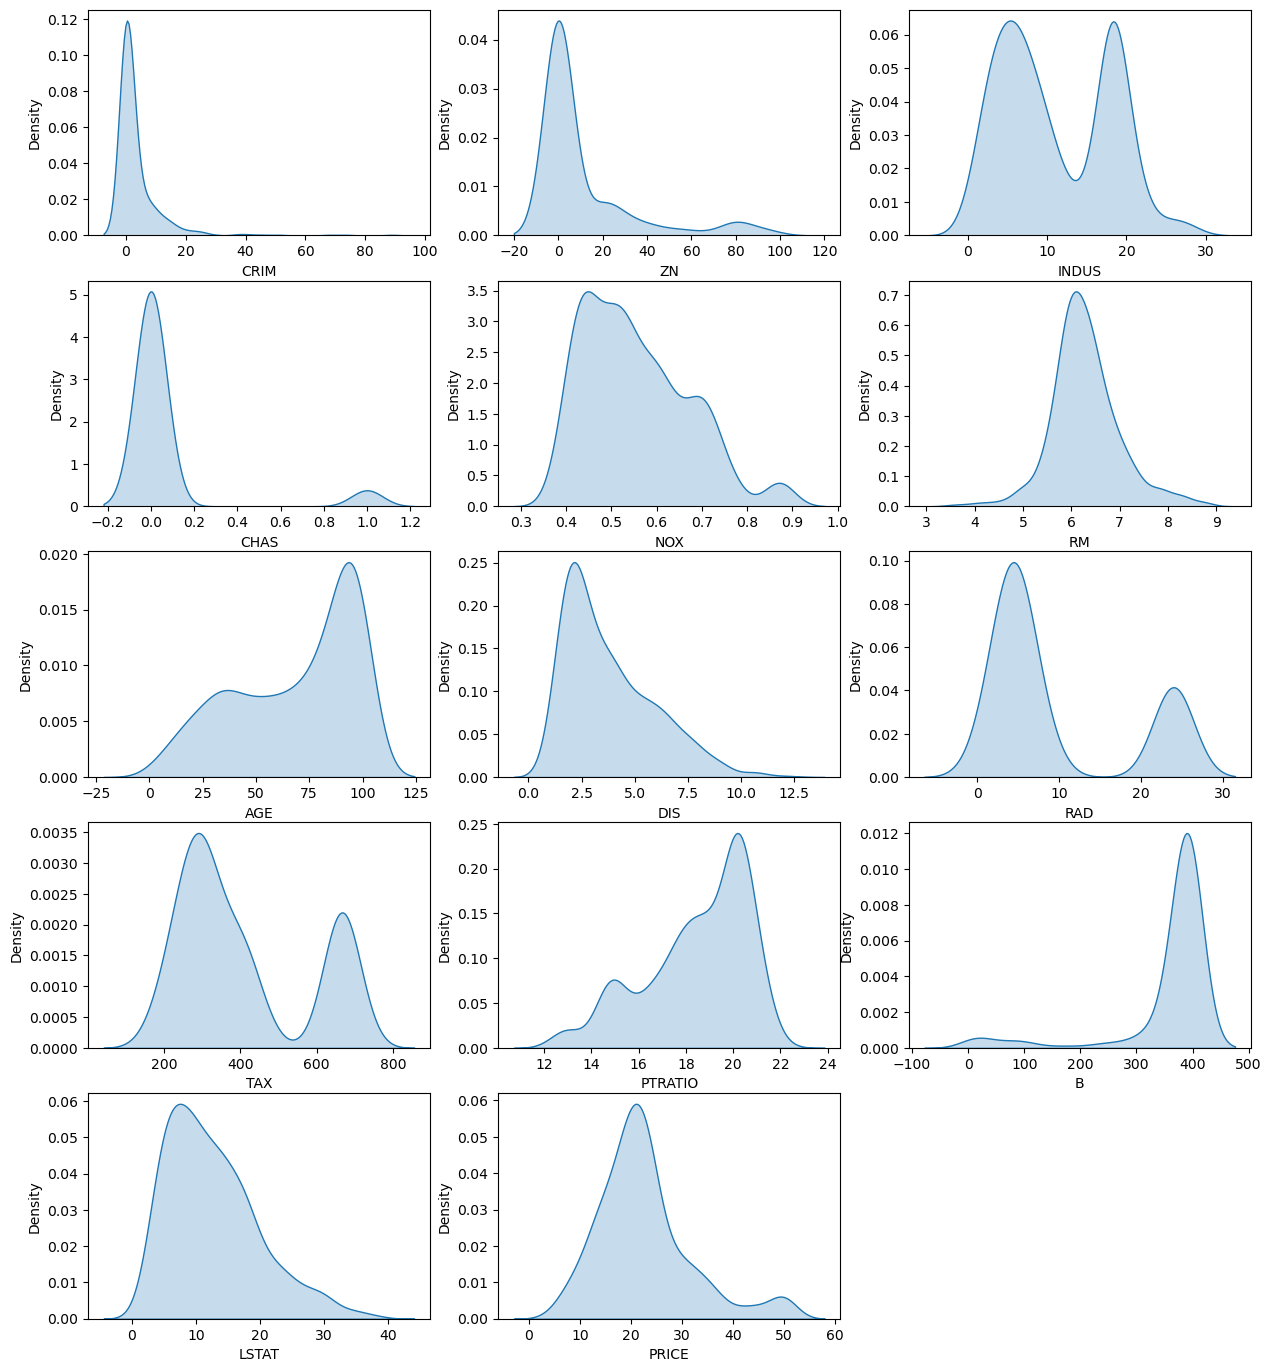

In [24]:
# Checking for data distribution

plt.figure(figsize = (15, 17))

i = 1
for col in df.columns:
    plt.subplot(5, 3, i)
    sns.kdeplot(df[col], fill = 1)
    i += 1

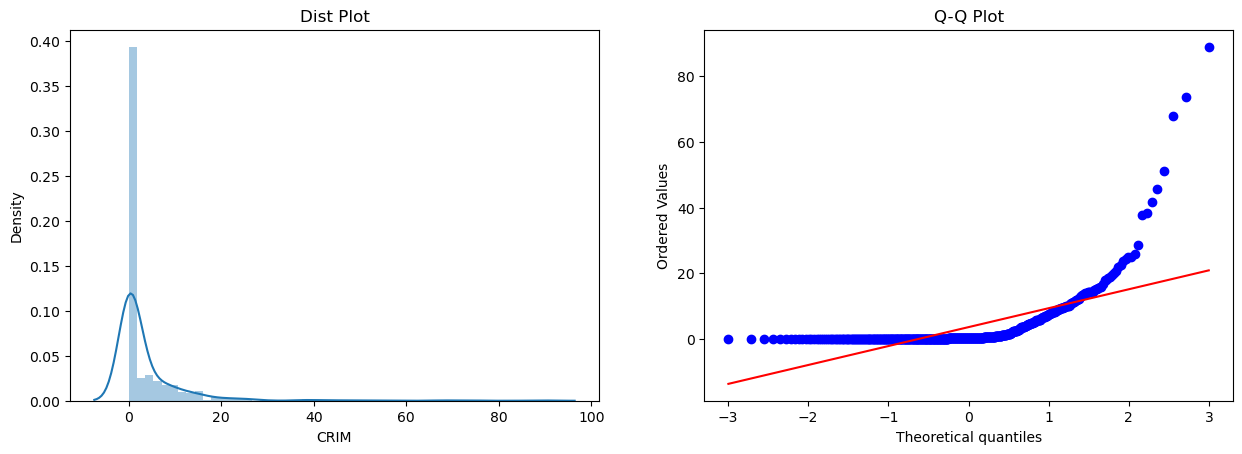

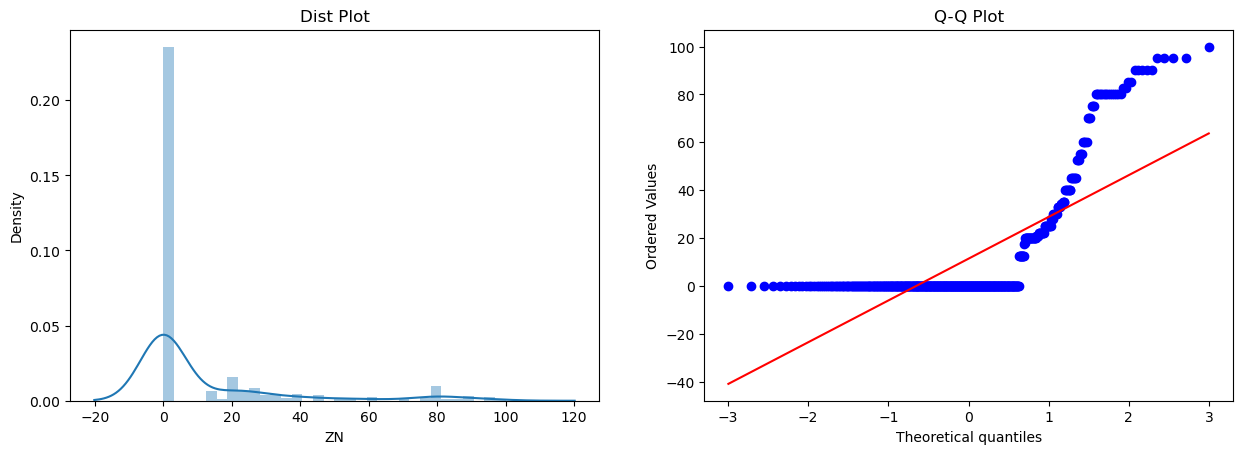

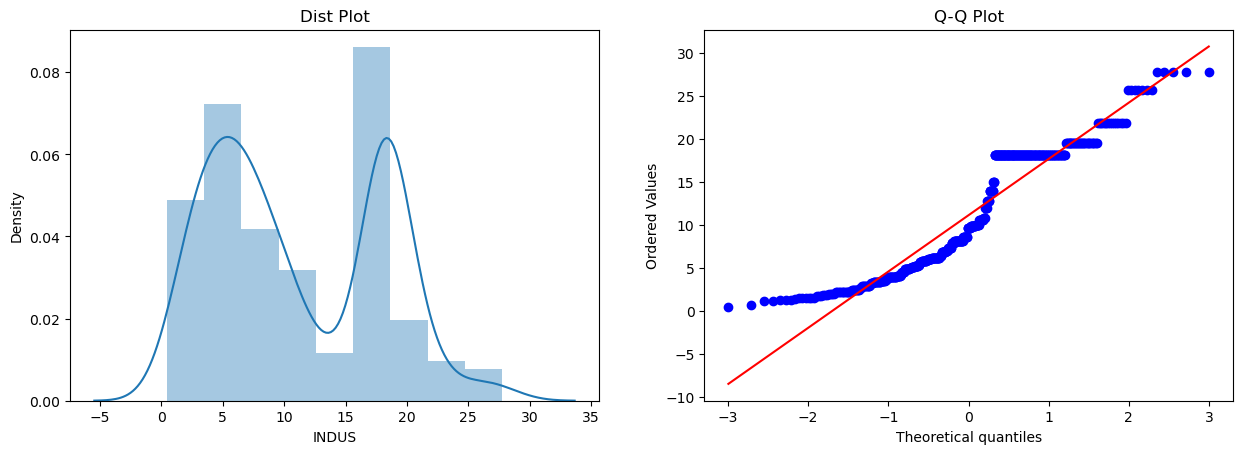

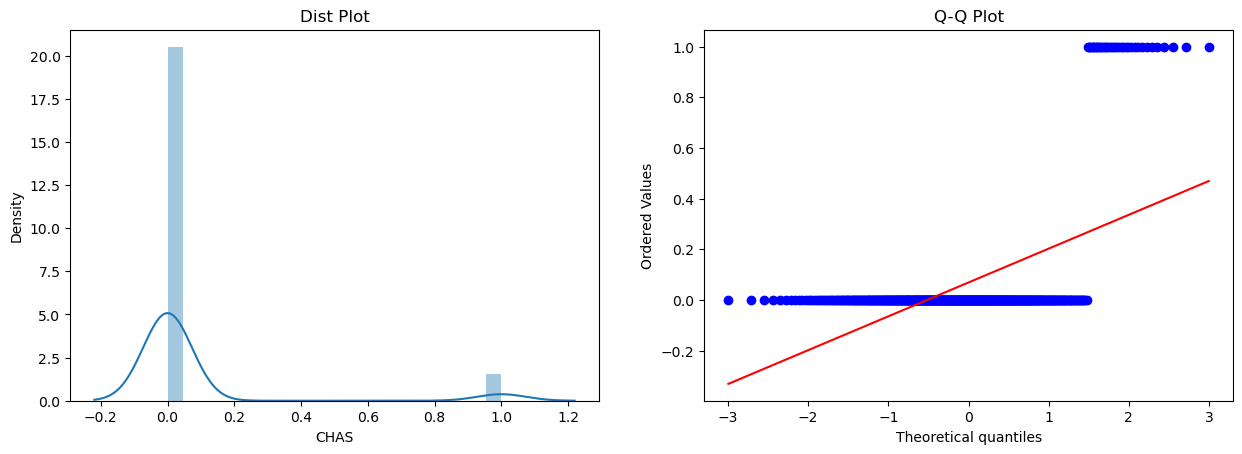

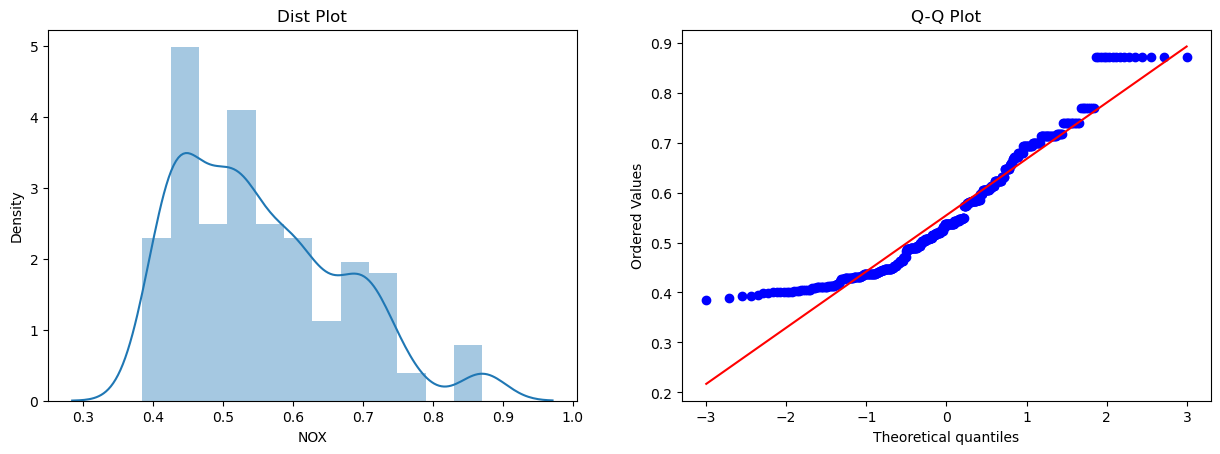

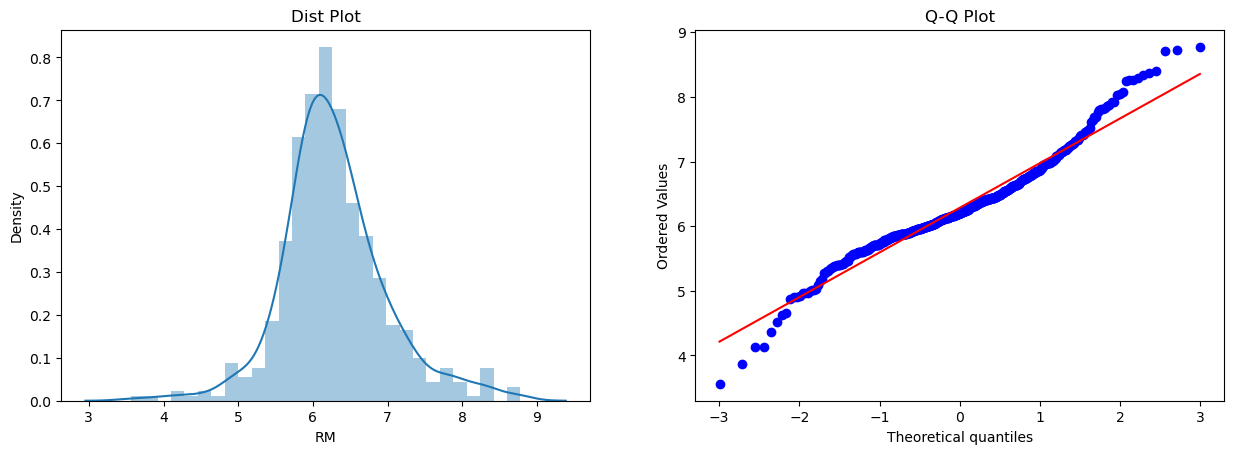

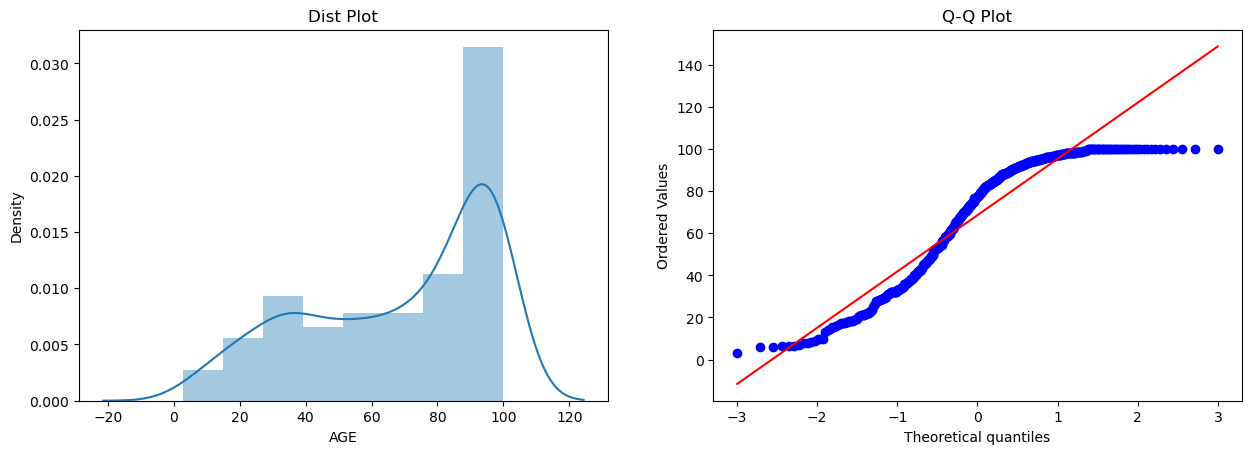

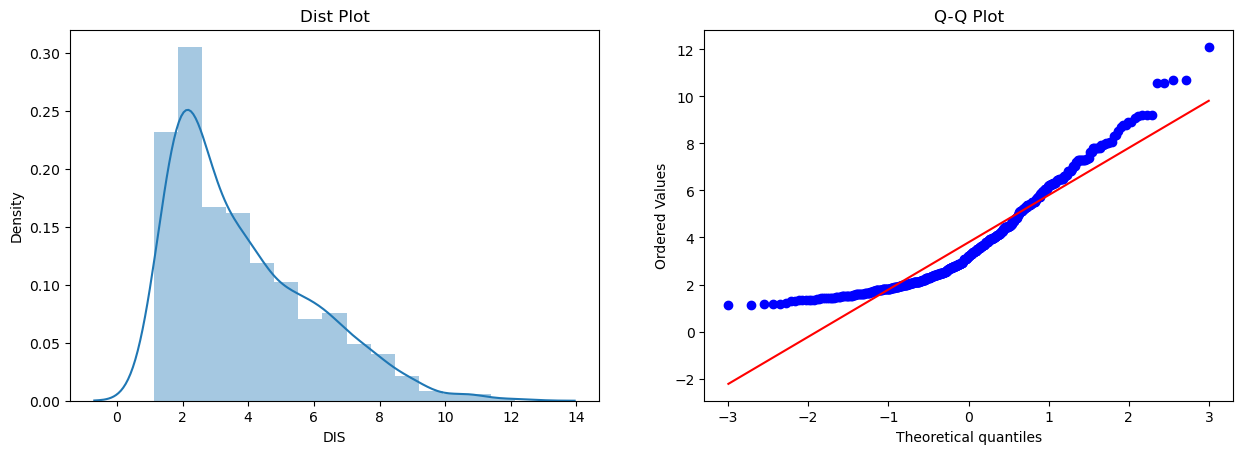

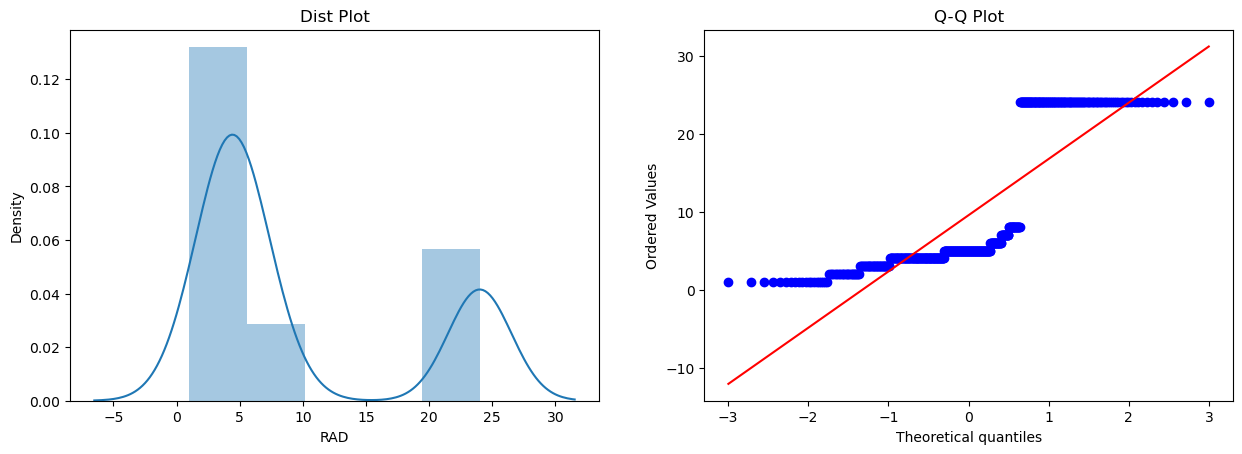

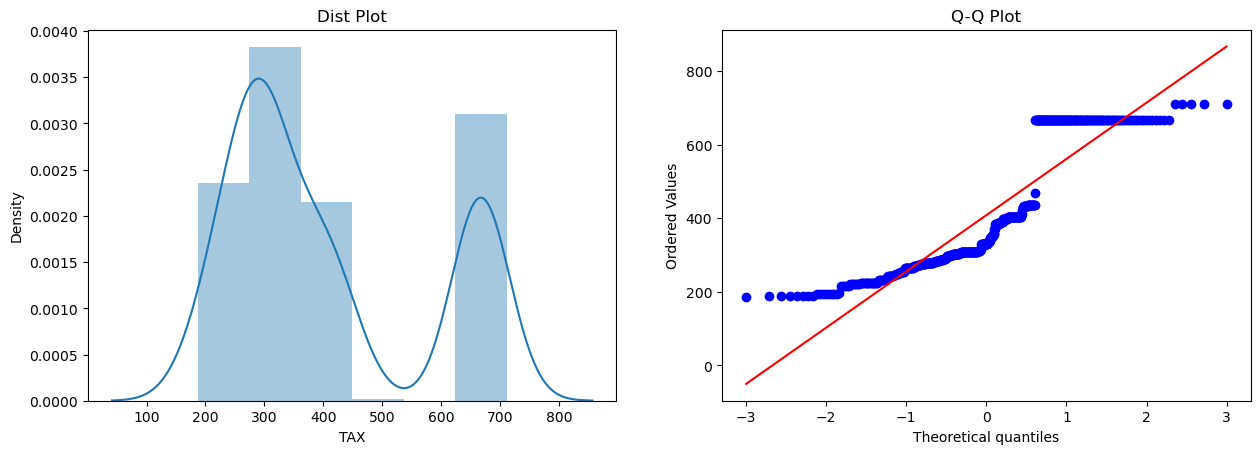

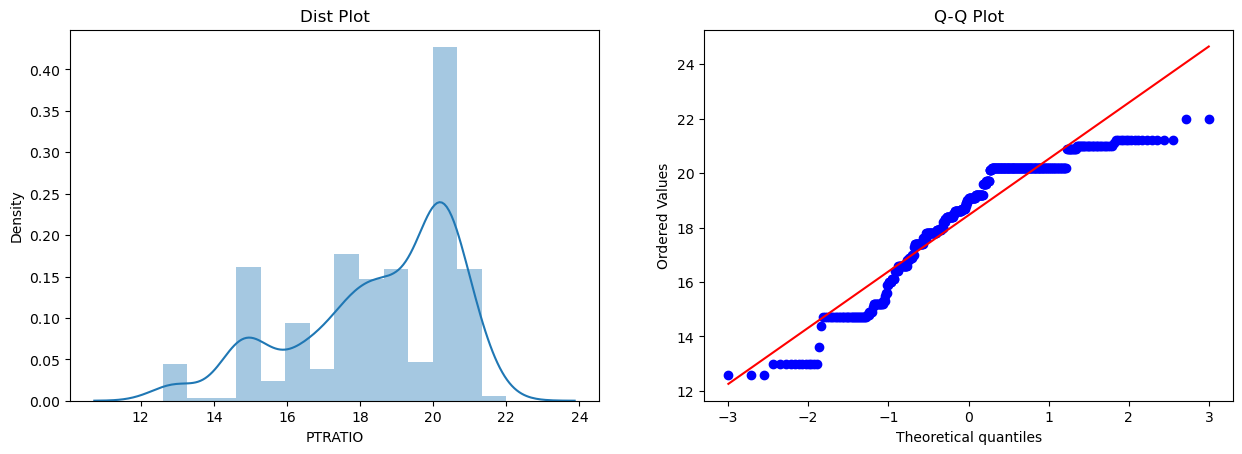

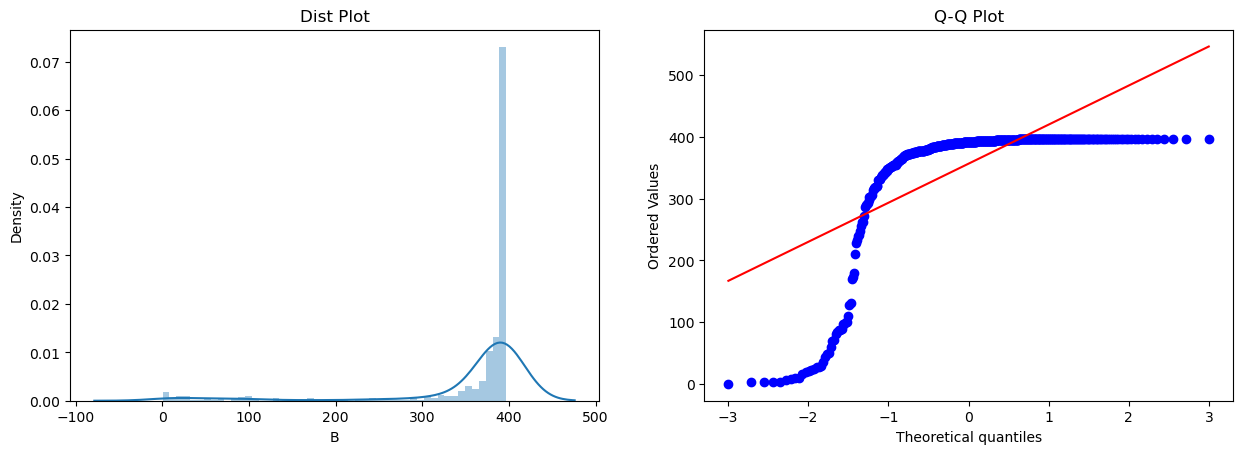

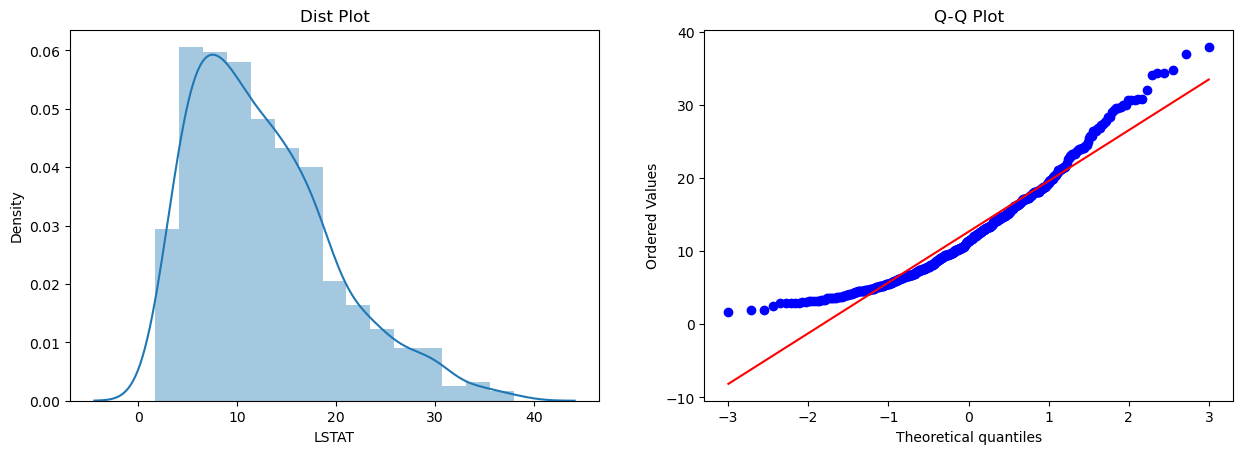

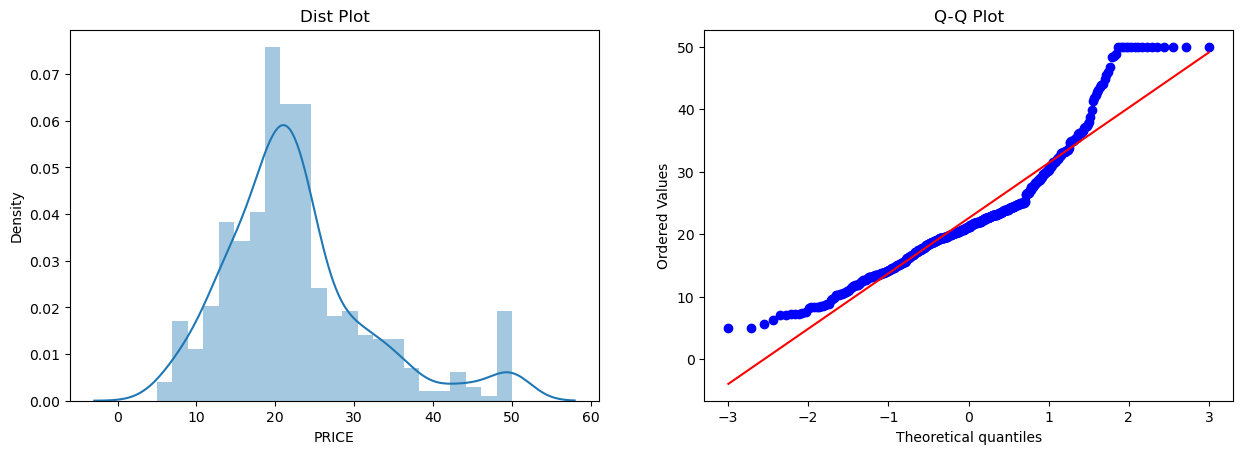

In [25]:
# Checking the data distribution using distance plot and Q-Q plot

for col in df.columns:
    plt.figure(figsize = (15, 80))
    plt.subplot(14, 2, 1)
    sns.distplot(df[col])
    plt.title('Dist Plot')
    
    plt.subplot(14, 2, 2)
    stats.probplot(df[col], dist = 'norm', plot = plt)
    plt.title("Q-Q Plot")
    plt.show()

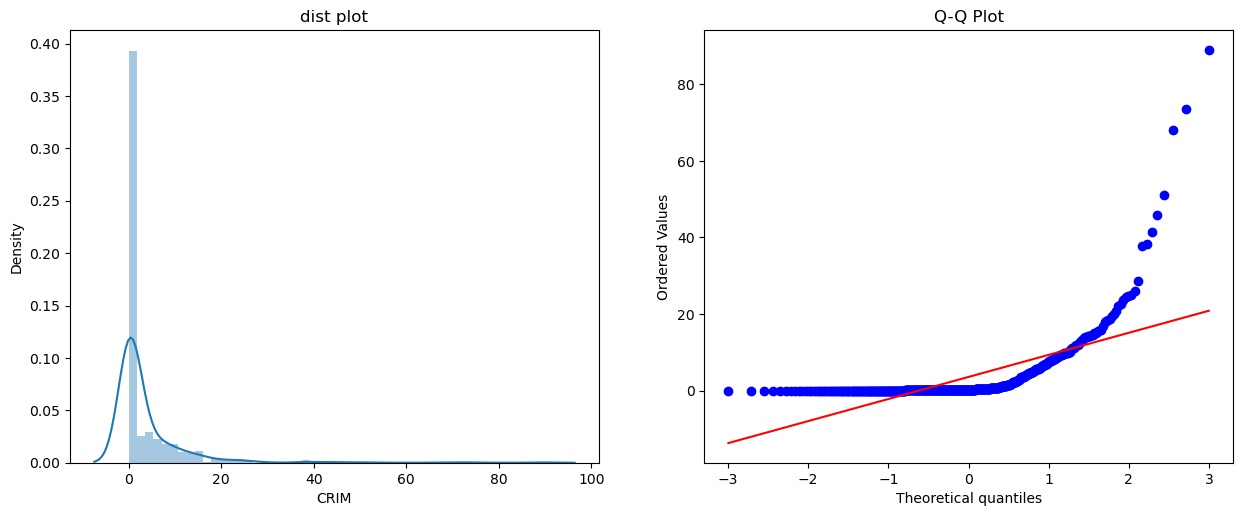

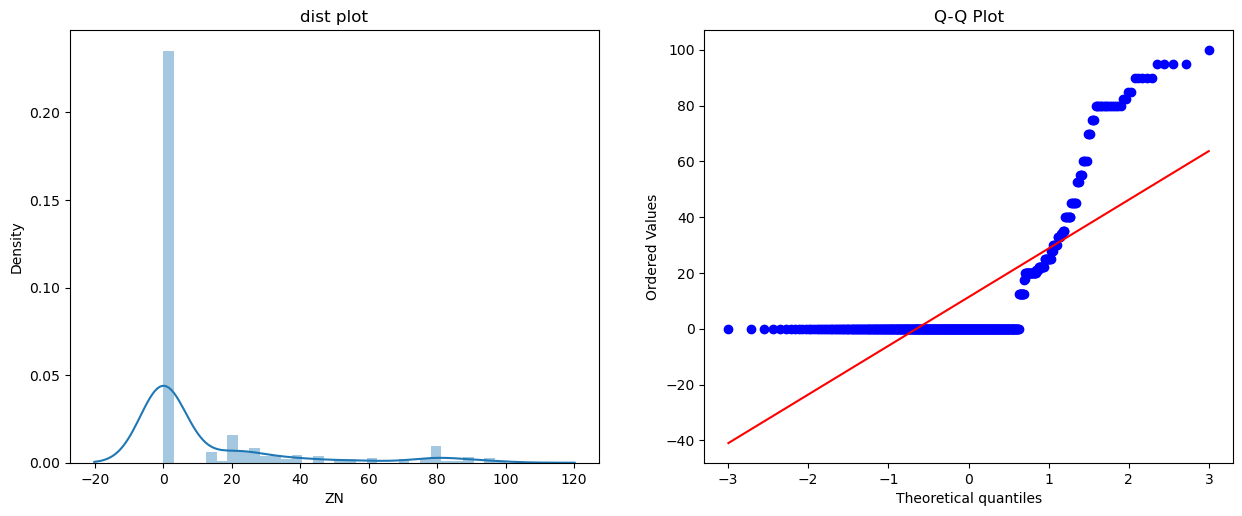

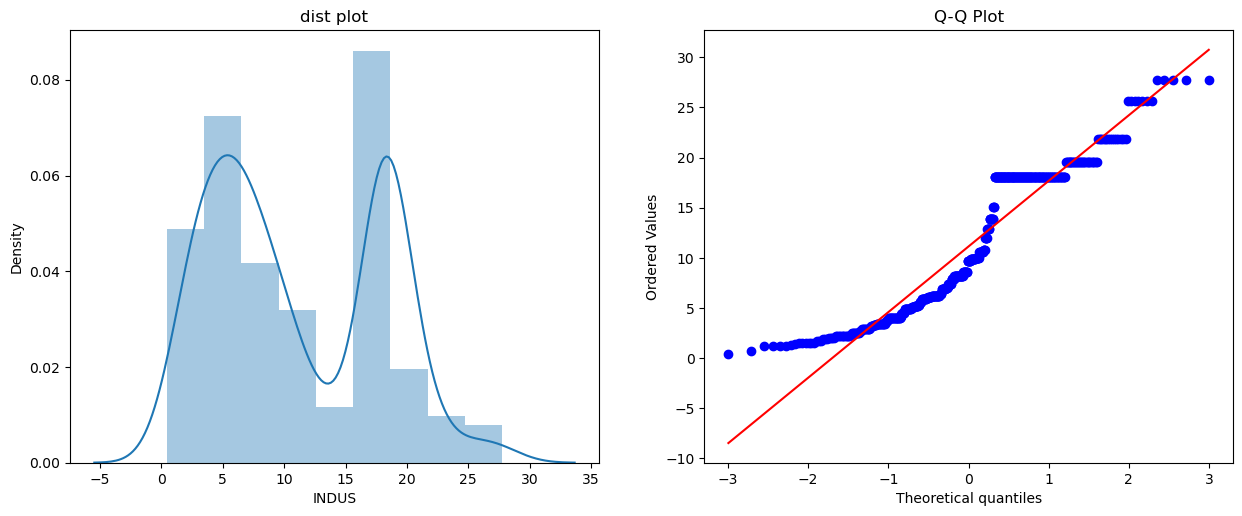

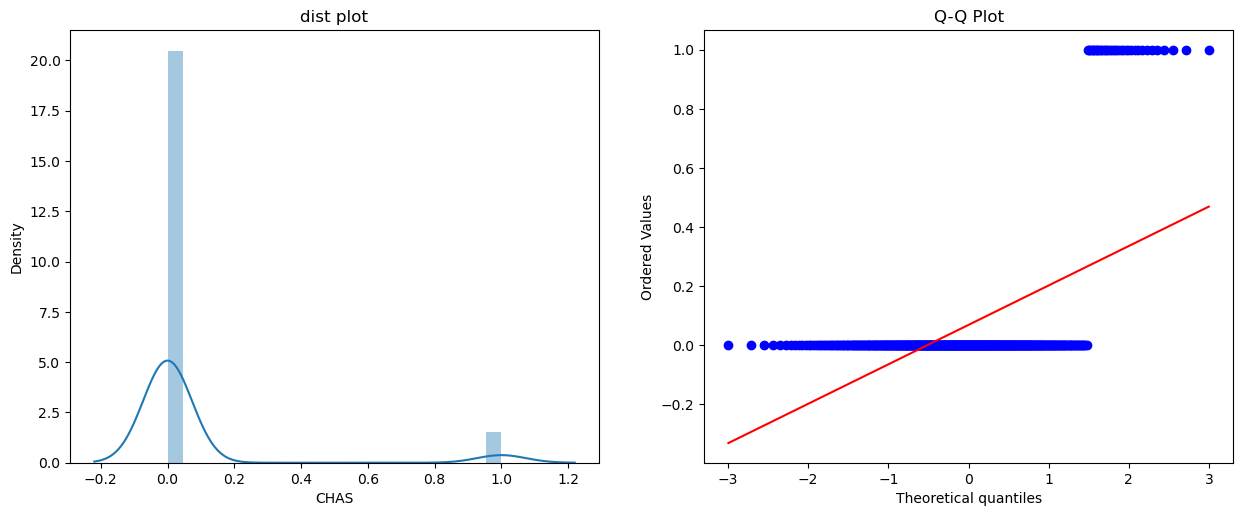

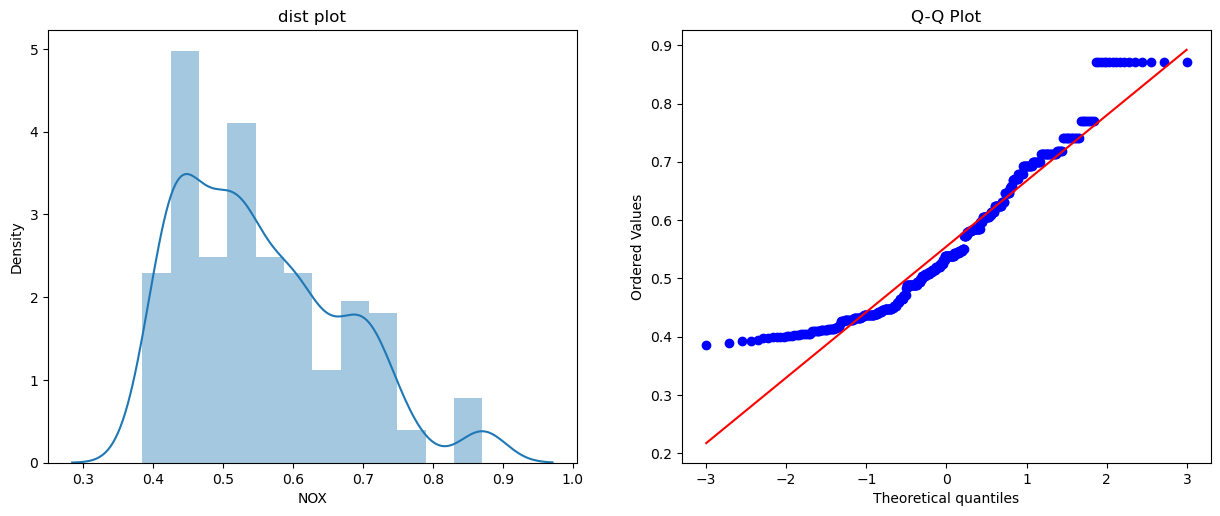

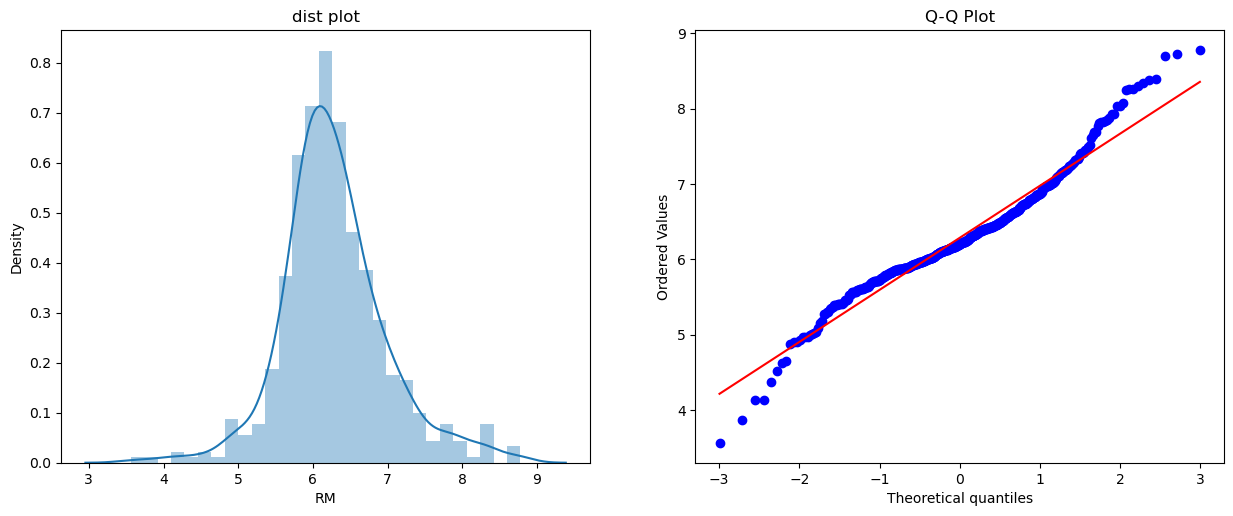

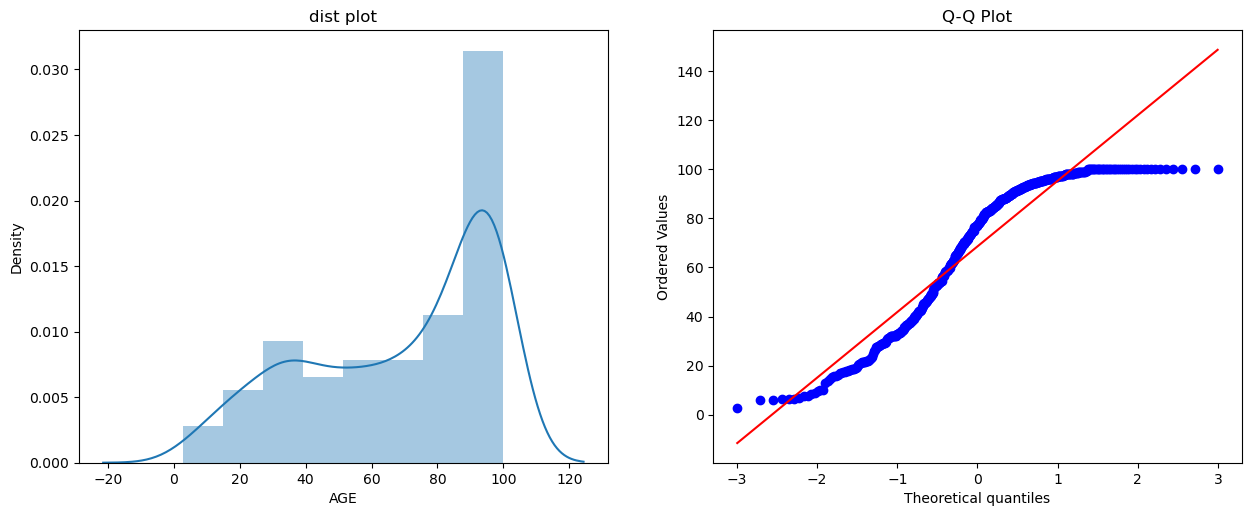

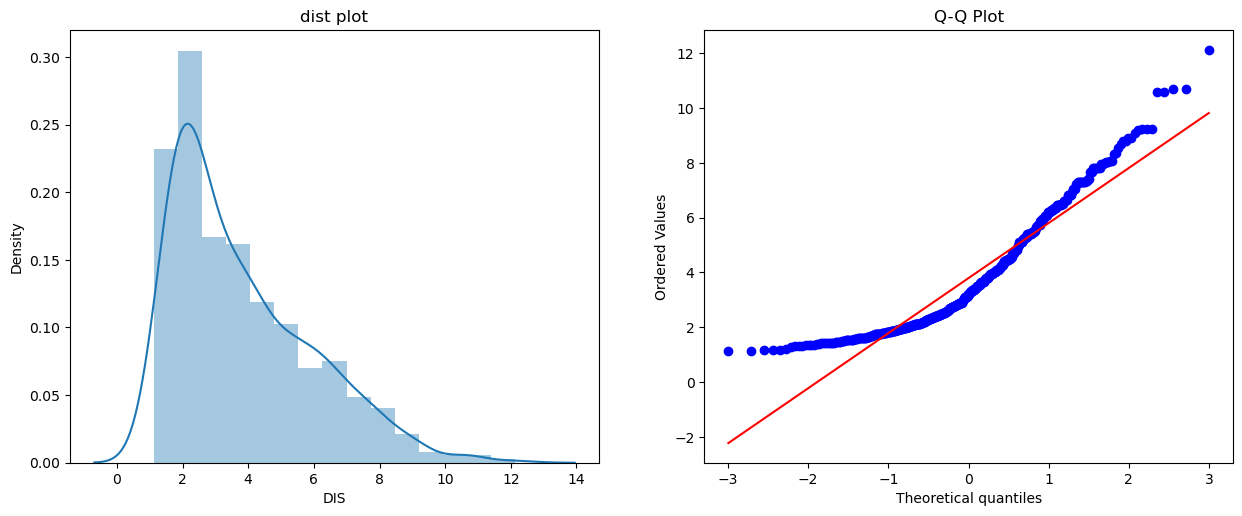

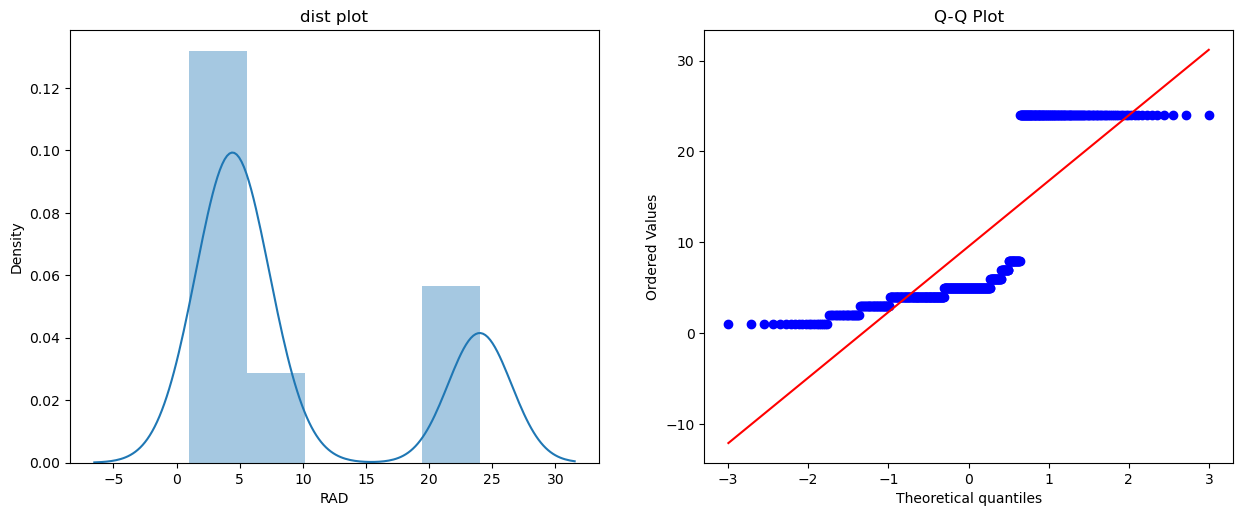

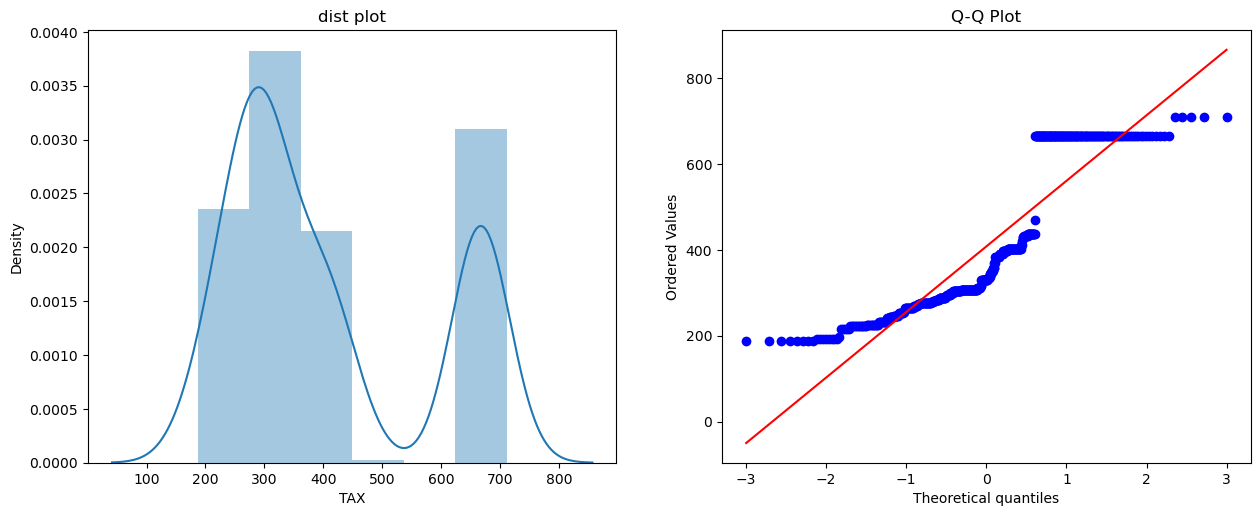

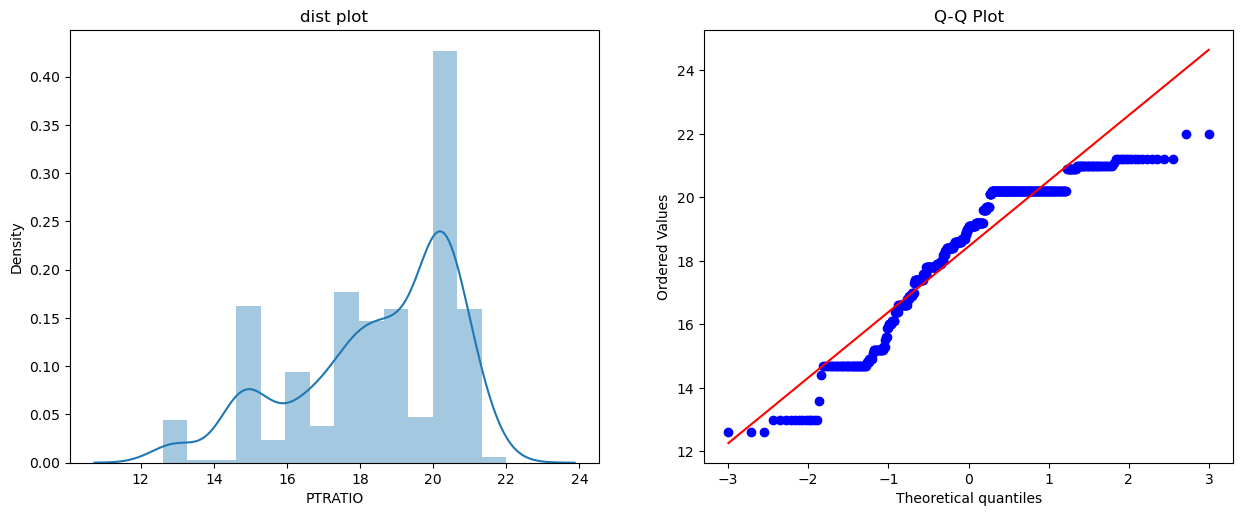

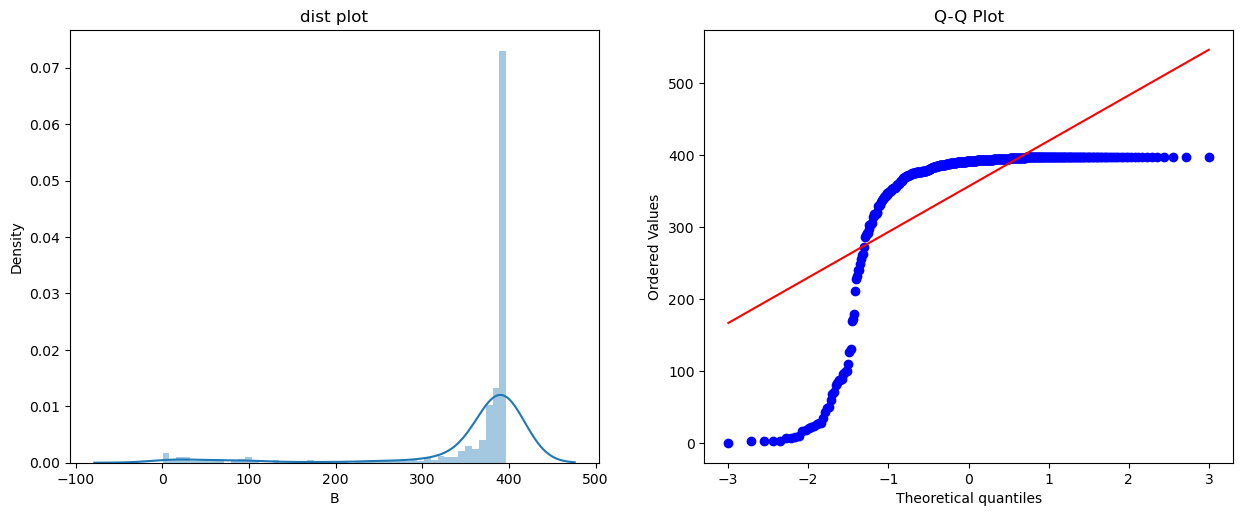

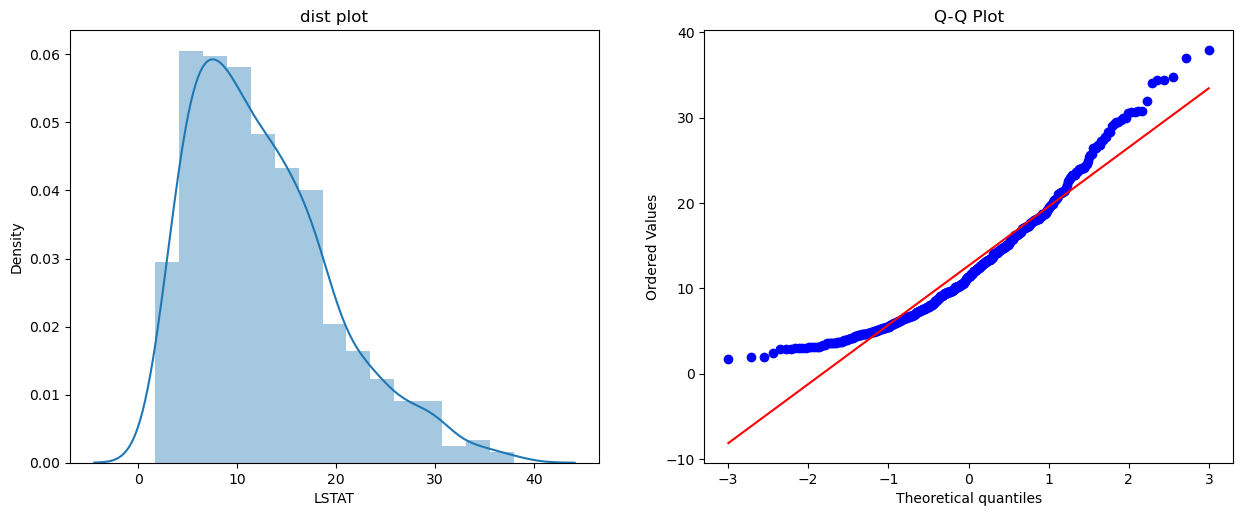

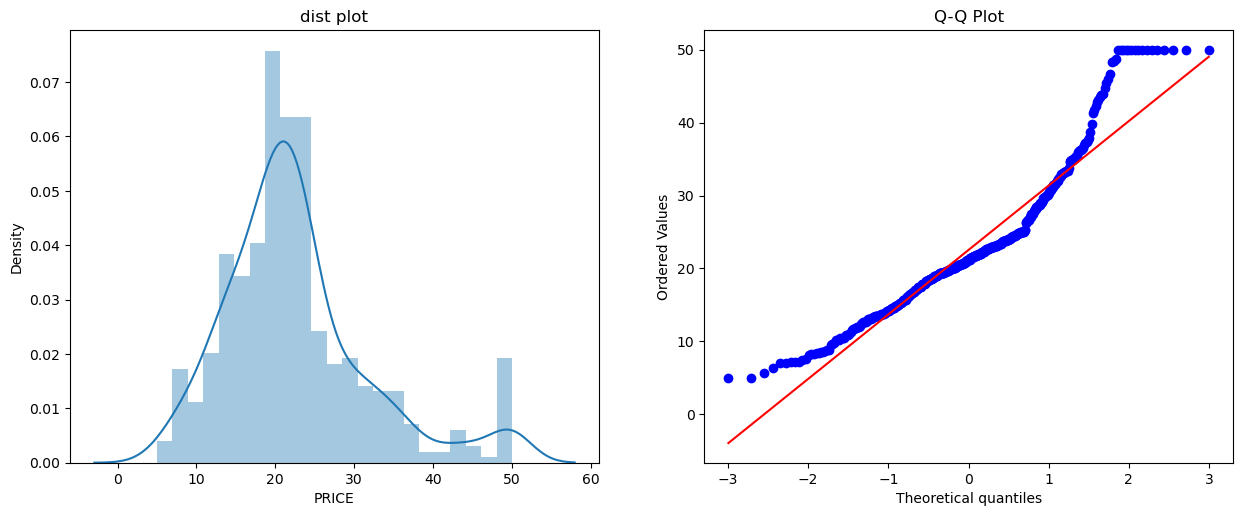

In [26]:
#checking the data distrubution using distance plot and Q - Q plot :

for col in df.columns:
    plt.figure(figsize=(15,100))
    plt.subplot(15, 2, 1)
    sns.distplot(df[col])
    plt.title("dist plot")
    plt.subplot(15, 2, 2)
    stats.probplot(df[col], dist="norm", plot=plt )
    plt.title("Q-Q Plot")
    plt.show()

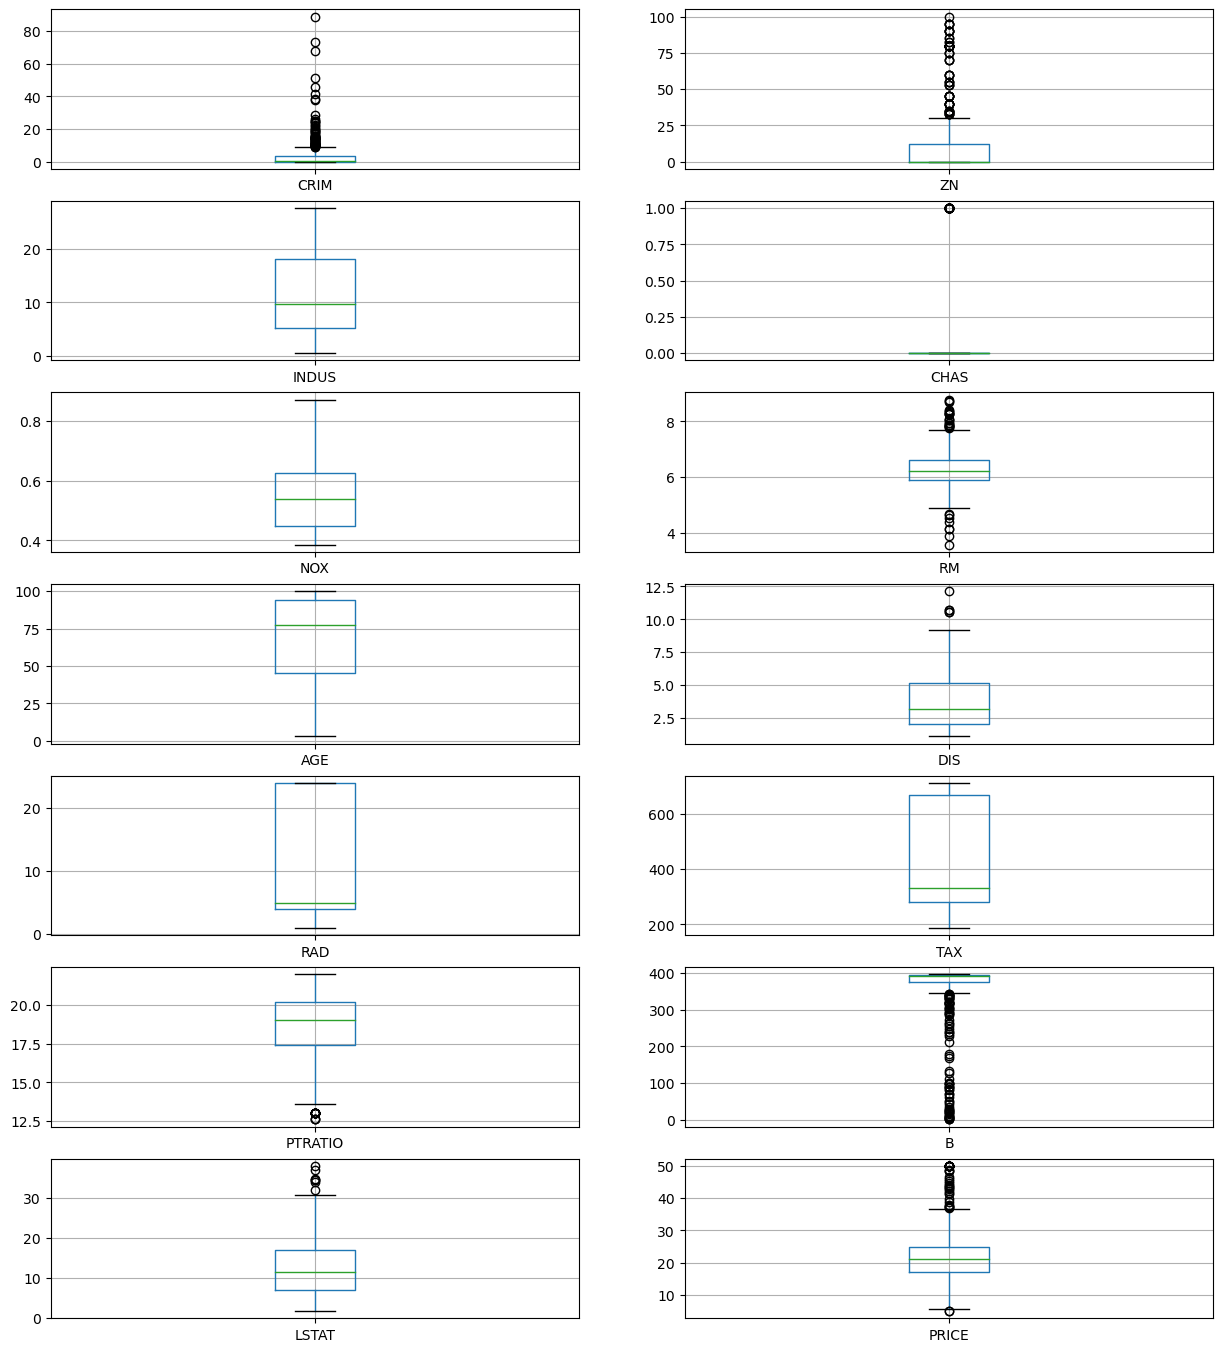

In [27]:
# finding Outliers :
# ploting boxplot

plt.figure(figsize = (15, 17))

i = 1

for col in df.columns:
    plt.subplot(7, 2, i)
    df[[col]].boxplot()
    i += 1

In [28]:
# Independent and Dependent features

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [29]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [30]:
# Standardize the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
X_train = pd.DataFrame(scaler.fit_transform(X_train))

In [32]:
X_test = scaler.transform(X_test)

In [33]:
import pickle
pickle.dump(scaler, open('scaling.pkl', 'wb'))

# Model Training

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
# Print the coefficients and the intercept

print(lr.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [37]:
print(lr.intercept_)

23.01581920903955


In [38]:
# On which parameter the model has been trained
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [39]:
# Prediction with Test Data

y_pred_lr = lr.predict(X_test)

## Assumption

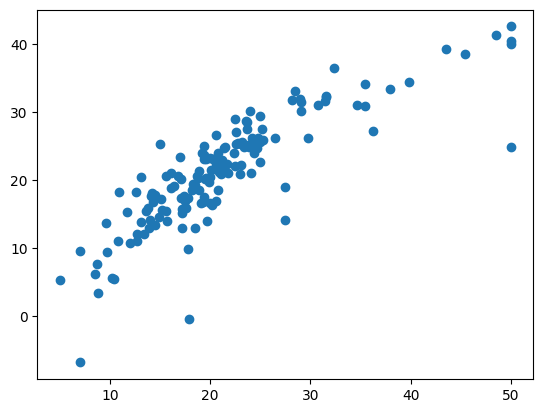

In [40]:
# Plot a scatter plot for the prediction

plt.scatter(y_test, y_pred_lr)
plt.show()

In [41]:
residuals = y_test - y_pred_lr

In [42]:
residuals

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: PRICE, Length: 152, dtype: float64

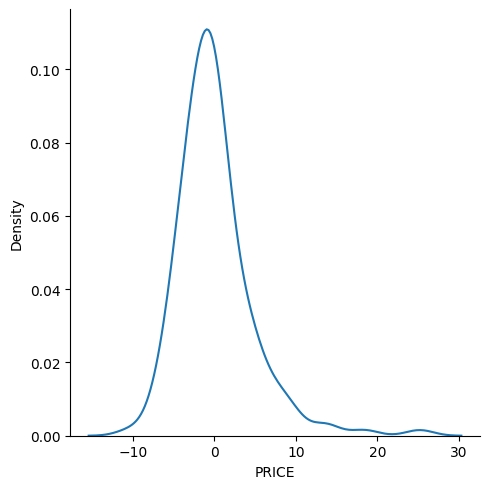

In [43]:
# Plot this Residuals

sns.displot(residuals, kind = 'kde')

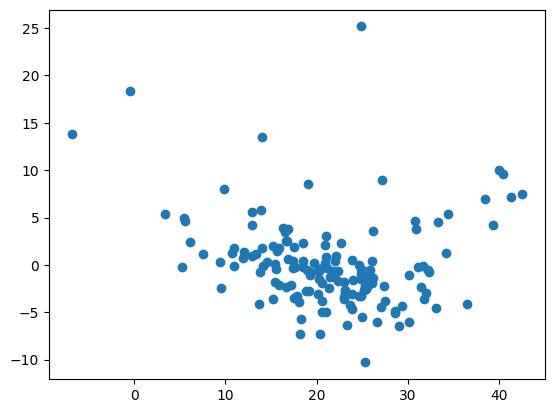

In [44]:
# Scatter Plot with respect to prediction and reduals

# uniform distribution
plt.scatter(y_pred_lr, residuals)

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("MAE :", mean_absolute_error(y_test, y_pred_lr))
print("MSE :", mean_squared_error(y_test, y_pred_lr))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

MAE : 3.1627098714574053
MSE : 21.517444231177205
RMSE : 4.6386899261728205


## R square And Adjusted R square

Formula

## R^2 = 1 - SSR / SST

R^2 = coefficient of determination SSR = sum of square of residuals, SST = total sum of square

In [46]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred_lr)
score


0.7112260057484934

### Adusted R2 = 1 - [(1 - R2) * (n - 1) / (n - k - 1)]

where:

R2: The R2 of the model, n: The Number of Observation, k: The number of predictor variable  

In [47]:
# Display adjusted R-square

1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1]-1)

0.6840226584639312

# New Data Prediction

In [48]:
boston.data[0].reshape(1, -1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [49]:
# Transformation of new data

scaler.transform(boston.data[0].reshape(1, -1))

array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [50]:
lr.predict(scaler.transform(boston.data[0].reshape(1, -1)))

array([30.08649576])

# Pickling The Model file for Deployment

In [51]:
import pickle

In [52]:
pickle.dump(lr, open('regmodel.pkl', 'wb'))

In [53]:
model = pickle.load(open('regmodel.pkl', 'rb'))

In [54]:
# Prediction

model.predict(scaler.transform(boston.data[0].reshape(1, -1)))

array([30.08649576])